In [1]:
## for data
import json
import pandas as pd
import numpy as np
from sklearn import metrics, manifold
## for processing
import re
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for w2v
import gensim
import gensim.downloader as gensim_api
## for bert
import transformers

/opt/conda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [25]:
nlp = gensim_api.load("glove-wiki-gigaword-300")

In [26]:
## Function to apply
def get_similar_words(lst_words, top, nlp):
    lst_out = lst_words
    for tupla in nlp.most_similar(lst_words, topn=top):
        lst_out.append(tupla[0])
    return list(set(lst_out))
## Create Dictionary {category:[keywords]}
dic_clusters = {}
dic_clusters["ENTERTAINMENT"] = get_similar_words(['celebrity','cinema','movie','music'], 
                  top=30, nlp=nlp)
dic_clusters["POLITICS"] = get_similar_words(['gop','clinton','president','obama','republican']
                  , top=30, nlp=nlp)
dic_clusters["TECH"] = get_similar_words(['amazon','android','app','apple','facebook',
                   'google','tech'], 
                   top=30, nlp=nlp)
## print some
for k,v in dic_clusters.items():
    print(k, ": ", v[0:5], "...", len(v))

ENTERTAINMENT :  ['soundtrack', 'celebrity', 'audiences', 'cinema', 'feature'] ... 34
POLITICS :  ['sen.', 'congressional', 'republican', 'voters', 'bush'] ... 35
TECH :  ['yahoo', 'software', 'smartphones', 'microsoft', 'myspace'] ... 37


In [4]:
## word embedding
tot_words = [word for v in dic_clusters.values() for word in v]
X = nlp[tot_words]

In [ ]:
print(len(tot_words), X.shape)
X[0:2]

In [6]:
## pca
pca = manifold.TSNE(perplexity=40, n_components=2, init='pca')
X = pca.fit_transform(X)
print(X.shape, X[0:2])

(106, 2) [[ 0.9420075  1.028006 ]
 [ 0.8830292 -2.0967746]]


In [7]:
## create dtf
dtf = pd.DataFrame()
for k,v in dic_clusters.items():
    size = len(dtf) + len(v)
    dtf_group = pd.DataFrame(X[len(dtf):size], columns=["x","y"], index=v)
    dtf_group["cluster"] = k
    dtf = dtf.append(dtf_group)

In [8]:
display(dtf_group.head(3))
display(dtf.head(3))
v

,x,y,cluster
facebook,4.636949,0.130948,TECH
twitter,4.522023,-0.108987,TECH
google,5.757146,0.226141,TECH


,x,y,cluster
tv,0.942007,1.028006,ENTERTAINMENT
musical,0.883029,-2.096775,ENTERTAINMENT
studio,1.349654,-1.132060,ENTERTAINMENT


['facebook',
 'twitter',
 'google',
 'user',
 'ios',
 'myspace',
 'microsoft',
 'skype',
 'internet',
 'android',
 'download',
 'yahoo',
 'itunes',
 'users',
 'tech',
 'amazon.com',
 'mobile',
 'website',
 'web',
 'app',
 'networking',
 'smartphone',
 'ipod',
 'software',
 'youtube',
 'intel',
 'netscape',
 'blackberry',
 'iphone',
 'ipad',
 'messaging',
 'browser',
 'smartphones',
 'amazon',
 'apps',
 'online',
 'apple']

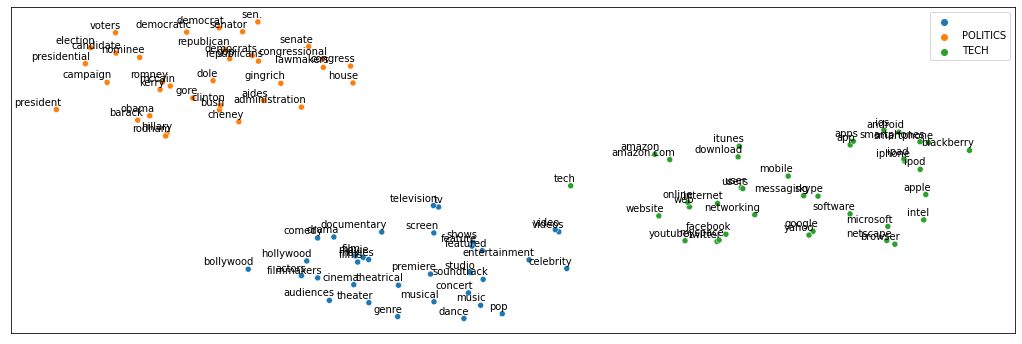

In [10]:
## plot
fig, ax = plt.subplots(figsize=(18,6))
sns.scatterplot(data=dtf, x="x", y="y", hue="cluster", ax=ax)
ax.legend().texts[0].set_text(None)
ax.set(xlabel=None, ylabel=None, xticks=[], xticklabels=[], 
       yticks=[], yticklabels=[])
for i in range(len(dtf)):
    ax.annotate(dtf.index[i], 
               xy=(dtf["x"].iloc[i],dtf["y"].iloc[i]), 
               xytext=(5,2), textcoords='offset points', 
               ha='right', va='bottom')

### Visualization of BERT

In [37]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
nlp = transformers.TFBertModel.from_pretrained('bert-base-uncased')
#dis_nlp = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [4]:
nlp.summary()

Model: "tf_bert_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
Total params: 109,482,240
Trainable params: 109,482,240
Non-trainable params: 0
_________________________________________________________________


In [5]:
dis_nlp.summary()

Model: "tf_distil_bert_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
distilbert (TFDistilBertMain multiple                  66362880  
Total params: 66,362,880
Trainable params: 66,362,880
Non-trainable params: 0
_________________________________________________________________


In [20]:
txt = "river bank"
## tokenize
idx = tokenizer.encode(txt)
print("idx:", idx)
print("tokens:", tokenizer.convert_ids_to_tokens(idx))
print("ids   :", tokenizer.encode(txt))

idx: [101, 2314, 2924, 102]
tokens: ['[CLS]', 'river', 'bank', '[SEP]']
ids   : [101, 2314, 2924, 102]


In [21]:
## word embedding
idx = np.array(idx)[None,:]
embedding = nlp(idx)
print(idx, "shape:", embedding[0][0].shape)

[[ 101 2314 2924  102]] shape: (4, 768)


In [18]:
embedding

TFBaseModelOutputWithPooling(last_hidden_state=<tf.Tensor: shape=(1, 4, 768), dtype=float32, numpy=
array([[[-0.30194896,  0.01486895, -0.07717887, ..., -0.32494316,
         -0.04397472,  0.41642505],
        [ 0.4382689 ,  0.26989633, -0.5568263 , ..., -0.21648282,
         -0.31513456, -0.5180026 ],
        [-0.07058237, -0.62152714, -0.70252043, ..., -0.4257198 ,
         -1.0008968 ,  0.10625627],
        [ 0.7814884 ,  0.08186372, -0.38303667, ...,  0.07119841,
         -0.67845464, -0.31039825]]], dtype=float32)>, pooler_output=<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-8.63738000e-01, -3.46856743e-01, -5.79884171e-01,
         7.54083991e-01,  2.34671831e-01, -1.12959936e-01,
         9.10928547e-01,  2.30558604e-01, -3.99565756e-01,
        -9.99967754e-01, -1.04155764e-01,  7.49128163e-01,
         9.69179213e-01,  2.33653098e-01,  8.99675786e-01,
        -6.42369807e-01, -3.05534661e-01, -5.60729086e-01,
         3.26236784e-01, -7.45217085e-01,  6.10596359e-

In [70]:
## vector of the second input word
embedding[0][0].shape

TensorShape([4, 768])

In [30]:
## function to apply
def embedding_bert(txt, tokenizer, nlp):
    idx = tokenizer.encode(txt)
    idx = np.array(idx)[None,:]  
    embedding = nlp(idx)
    X = np.array(embedding[0][0][1:-1]) # remove 
    return X

#### Visually expalined the classified document

In [55]:
txt_instance = "republican fail take hillary clinton 11hour benghazi hearing"
## create embedding Matrix
y = np.concatenate([embedding_bert(v, tokenizer, nlp) for v in dic_clusters.values()]) # keywords of three classes
X = embedding_bert(txt_instance, tokenizer,nlp).mean(0).reshape(1,-1) # mean vector
M = np.concatenate([y,X])
print(y.shape, X.shape, M.shape)

(106, 768) (1, 768) (107, 768)


In [56]:
## pca
pca = manifold.TSNE(perplexity=40, n_components=2, init='pca')
M = pca.fit_transform(M)
y, X = M[:len(y)], M[len(y):]
print(y.shape, X.shape)

(106, 2) (1, 2)


In [57]:
## create dtf clusters
dtf = pd.DataFrame()
for k,v in dic_clusters.items():
    size = len(dtf) + len(v)
    dtf_group = pd.DataFrame(y[len(dtf):size], columns=["x","y"], index=v)
    dtf_group["cluster"] = k
    dtf = dtf.append(dtf_group)
dtf.sample(5)

,x,y,cluster
amazon,-4.928313,-0.707500,TECH
drama,0.500474,-0.976816,ENTERTAINMENT
presidential,3.459270,3.887716,POLITICS
president,3.283889,4.507151,POLITICS
bollywood,1.961273,-1.891671,ENTERTAINMENT


{38: 0.99997175, 40: 0.9998151, 43: 0.99977005, 54: 0.9996893, 59: 0.9983827, 37: 0.99828017, 56: 0.99810827, 41: 0.99767166, 60: 0.99743074, 57: 0.9969101, 55: 0.99634683, 53: 0.9957619, 39: 0.99564785, 47: 0.9950764, 61: 0.993917, 67: 0.99281776, 63: 0.9925163, 25: 0.9886199, 22: 0.98560524, 66: 0.98116416, 68: 0.9808536, 64: 0.98049575, 52: 0.9731668, 46: 0.9687222, 42: 0.9673223, 48: 0.96669674, 44: 0.9656167, 27: 0.9578207, 50: 0.9511137, 35: 0.9322486, 36: 0.9312024, 26: 0.9274469, 1: 0.90993977, 29: 0.9061491, 32: 0.88571495, 2: 0.86136246, 4: 0.8449801, 49: 0.78426826, 45: 0.7732955, 34: 0.77157074, 24: 0.7711581, 51: 0.76499486, 58: 0.7569589, 62: 0.753243, 65: 0.7531045, 30: 0.7509996, 33: 0.71113515, 28: 0.627823, 71: 0.5872864, 99: 0.57887334, 80: 0.57769704, 102: 0.57527596, 31: 0.5029653, 21: 0.49984246, 3: 0.35220772, 23: 0.32349235, 0: 0.29041928, 20: 0.25551197, 92: 0.09637168, 8: 0.08415595, 5: 0.05602649, 18: 0.039332956, 93: -0.0021990836, 79: -0.06607118, 11: -0.12

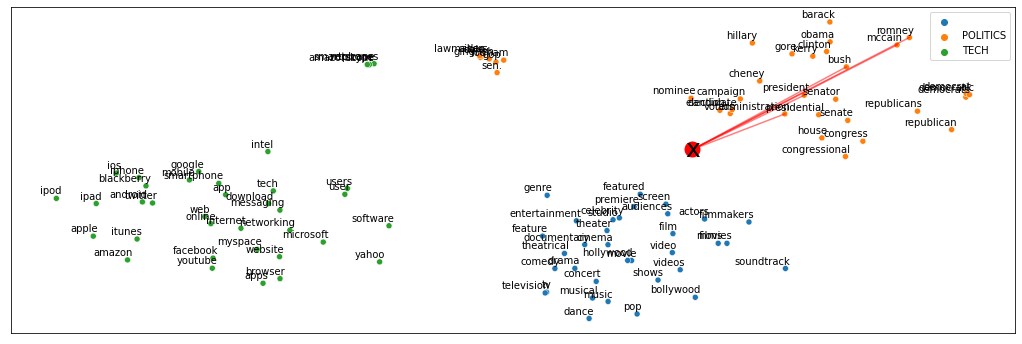

In [63]:
## plot clusters
fig, ax = plt.subplots(figsize=(18,6))
sns.scatterplot(data=dtf, x="x", y="y", hue="cluster", ax=ax)
ax.legend().texts[0].set_text(None)
ax.set(xlabel=None, ylabel=None, xticks=[], xticklabels=[], 
       yticks=[], yticklabels=[])
for i in range(len(dtf)):
    ax.annotate(dtf.index[i], 
               xy=(dtf["x"].iloc[i],dtf["y"].iloc[i]), 
               xytext=(5,2), textcoords='offset points', 
               ha='right', va='bottom')

## add txt_instance
ax.scatter(x=X[0][0], y=X[0][1], c="red", linewidth=10)
ax.annotate("x", xy=(X[0][0],X[0][1]), ha='center', va='center', fontsize=25)

## calculate similarity
sim_matrix = metrics.pairwise.cosine_similarity(X, y)

## add top similarity
for row in range(sim_matrix.shape[0]):
    ### sorted {keyword:score}
    dic_sim = {n:sim_matrix[row][n] for n in 
               range(sim_matrix.shape[1])}
    dic_sim = {k:v for k,v in sorted(dic_sim.items(), key=lambda item:item[1], reverse=True)} # Sort dictionary in descending order by value
    print(dic_sim)
    ### plot lines
    for k in dict(list(dic_sim.items())[0:5]).keys():
        p1 = [X[row][0], X[row][1]]
        p2 = [y[k][0], y[k][1]]
        ax.plot([p1[0],p2[0]], [p1[1],p2[1]], c="red", alpha=0.5)
plt.show()

#### Visually expalined the classified words

In [106]:
## create embedding Matrix
txt_instance = "republican fail take hillary clinton 11hour benghazi hearing"
y = np.concatenate([embedding_bert(v, tokenizer, nlp) for v in dic_clusters.values()])
X = embedding_bert(txt_instance, tokenizer, nlp)
M = np.concatenate([y,X])
print(y.shape, X.shape, M.shape)

(106, 768) (12, 768) (118, 768)


In [107]:
## pca
pca = manifold.TSNE(perplexity=40, n_components=2, init='pca')
M = pca.fit_transform(M)
y, X = M[:len(y)], M[len(y):]
print(y.shape, X.shape, M.shape)

(106, 2) (12, 2) (118, 2)


In [108]:
## create dtf clusters
dtf = pd.DataFrame()
for k,v in dic_clusters.items():
    size = len(dtf) + len(v)
    dtf_group = pd.DataFrame(y[len(dtf):size], columns=["x","y"], 
                             index=v)
    dtf_group["cluster"] = k
    dtf = dtf.append(dtf_group)
dtf.sample(4)

,x,y,cluster
voters,-5.139902,1.868527,POLITICS
feature,-0.492385,-0.850970,ENTERTAINMENT
dance,2.437668,-0.491364,ENTERTAINMENT
ipod,-2.675133,-6.682253,TECH


In [109]:
## add txt_instance
tokens = tokenizer.convert_ids_to_tokens(tokenizer.encode(txt_instance))[1:-1]
dtf = pd.DataFrame(X, columns=["x","y"], index=tokens)
dtf = dtf[~dtf.index.str.contains("#")]
dtf = dtf[dtf.index.str.len() > 1]
X = dtf.values
ax.scatter(x=dtf["x"], y=dtf["y"], c="red")
for i in range(len(dtf)):
     ax.annotate(dtf.index[i], 
                 xy=(dtf["x"].iloc[i],dtf["y"].iloc[i]), 
                 xytext=(5,2), textcoords='offset points', 
                 ha='right', va='bottom')
dtf.sample(4)

,x,y
ben,-1.196877,4.344501
take,-3.609720,0.666193
11,-2.673823,1.846472
hearing,-3.633527,1.076276


(106, 768) (12, 768) (118, 768)
(106, 2) (12, 2) (118, 2)


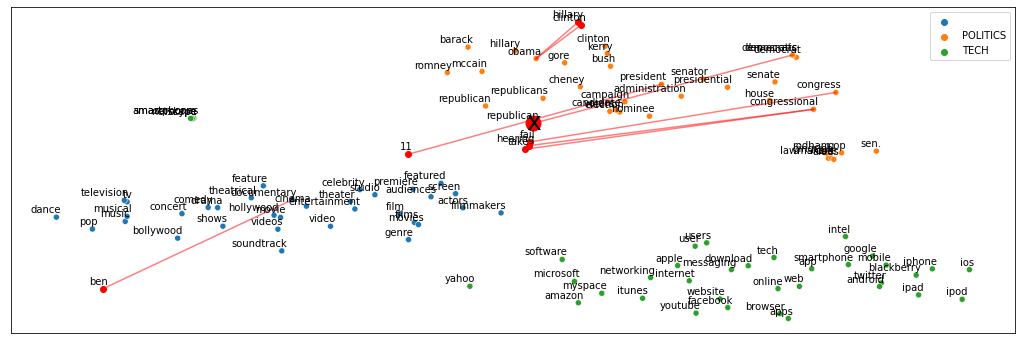

In [120]:
## create embedding Matrix
txt_instance = "republican fail take hillary clinton 11hour benghazi hearing"
y = np.concatenate([embedding_bert(v, tokenizer, nlp) for v in dic_clusters.values()])
X = embedding_bert(txt_instance, tokenizer, nlp)
M = np.concatenate([y,X])
print(y.shape, X.shape, M.shape)

## pca
pca = manifold.TSNE(perplexity=40, n_components=2, init='pca')
M = pca.fit_transform(M)
y, X = M[:len(y)], M[len(y):]
print(y.shape, X.shape, M.shape)

fig, ax = plt.subplots(figsize=(18,6))

## create dtf clusters
dtf = pd.DataFrame()
for k,v in dic_clusters.items():
    size = len(dtf) + len(v)
    dtf_group = pd.DataFrame(y[len(dtf):size], columns=["x","y"], 
                             index=v)
    dtf_group["cluster"] = k
    dtf = dtf.append(dtf_group)
sns.scatterplot(data=dtf, x="x", y="y", hue="cluster", ax=ax)
ax.legend().texts[0].set_text(None)
ax.set(xlabel=None, ylabel=None, xticks=[], xticklabels=[], 
       yticks=[], yticklabels=[])
for i in range(len(dtf)):
    ax.annotate(dtf.index[i], 
               xy=(dtf["x"].iloc[i],dtf["y"].iloc[i]), 
               xytext=(5,2), textcoords='offset points', 
               ha='right', va='bottom')

## add txt_instance
ax.scatter(x=X[0][0], y=X[0][1], c="red", linewidth=10)
ax.annotate("x", xy=(X[0][0],X[0][1]), ha='center', va='center', fontsize=25)

""" ------------------------------------------------ """

## add txt_instance
tokens = tokenizer.convert_ids_to_tokens(tokenizer.encode(txt_instance))[1:-1]
dtf = pd.DataFrame(X, columns=["x","y"], index=tokens)
dtf = dtf[~dtf.index.str.contains("#")]
dtf = dtf[dtf.index.str.len() > 1]
X = dtf.values
ax.scatter(x=dtf["x"], y=dtf["y"], c="red")
for i in range(len(dtf)):
     ax.annotate(dtf.index[i], 
                 xy=(dtf["x"].iloc[i],dtf["y"].iloc[i]), 
                 xytext=(5,2), textcoords='offset points', 
                 ha='right', va='bottom')
        
## calculate similarity
sim_matrix = metrics.pairwise.cosine_similarity(X, y)

## add top similarity
for row in range(sim_matrix.shape[0]):
    ### sorted {keyword:score}
    dic_sim = {n:sim_matrix[row][n] for n in 
               range(sim_matrix.shape[1])}
    dic_sim = {k:v for k,v in sorted(dic_sim.items(), 
                key=lambda item:item[1], reverse=True)}
    ### plot lines
    for k in dict(list(dic_sim.items())[0:1]).keys():
        p1 = [X[row][0], X[row][1]]
        p2 = [y[k][0], y[k][1]]
        ax.plot([p1[0],p2[0]], [p1[1],p2[1]], c="red", alpha=0.5)
plt.show()

In [118]:
dtf.index

Index(['republican', 'fail', 'take', 'hillary', 'clinton', '11', 'ben',
       'hearing'],
      dtype='object')